# 📊 Análisis de Rendimiento del Canal de YouTube  
### Autor: Edna L. Sánchez  
📅 Octubre 2025  

---

## 🔍 Proyecto de Portafolio Profesional – Strategic Data Analyst (MBA)

Este proyecto presenta un análisis profundo del rendimiento de un canal de YouTube, utilizando datos exportados desde la plataforma. El objetivo es extraer insights clave sobre el comportamiento de la audiencia, la interacción con el contenido y los patrones de monetización.

### 👤 Sobre el autor

Analista de Datos Estratégico con formación MBA, combinando habilidades analíticas, pensamiento de negocio y experiencia en contenido digital. Capacidad probada para transformar datos en decisiones accionables orientadas a crecimiento y engagement.

---

📁 **Dataset**: Exportación CSV de YouTube Analytics  
🎯 **Objetivo**: Identificar qué tipo de contenido genera más engagement, vistas e ingresos.



## 🎯 B. Objetivo del Análisis

El objetivo principal de este análisis es evaluar el rendimiento de los videos de un canal de YouTube para identificar qué tipo de contenido genera mayor:

- Engagement (retención, clics, CTR)
- Crecimiento (vistas, suscriptores)
- Monetización (ingresos)

A través del análisis exploratorio de datos (EDA), visualizaciones y correlaciones, se buscará responder preguntas clave como:

- ¿Qué videos tienen mejor desempeño?
- ¿Qué factores se relacionan con un mayor CTR o retención?
- ¿Cómo varía el rendimiento a lo largo del tiempo?
- ¿Qué países o formatos generan más vistas?

El análisis está orientado a la toma de decisiones estratégicas para optimizar el contenido y mejorar los resultados del canal.


## 📦 C. Importación de librerías y carga de datos

En esta sección se importan las librerías necesarias para el análisis de datos, visualización y manipulación del dataset. También se carga el archivo CSV exportado desde YouTube Analytics a través de vidIQ.

📂 **Ruta del archivo**: Asegúrate de actualizar la ruta local al archivo CSV según tu entorno.  
🔤 **Observación**: Se revisa una muestra inicial de los datos para validar la carga correcta.


In [1]:
# 📦 Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Cargar el archivo CSV desde la ruta local (Windows)
file_path = r"C:\Users\User\Desktop\dashboard youtube\Exportador CSV de vidIQ para undefined 2025-10-29.csv"
df = pd.read_csv(file_path)

# 👀 Vista rápida de las primeras filas
df.head()


,ID,TÍTULO,DESCRIPCIÓN,DURACIÓN,ESTADO,FECHA DE PUBLICACIÓN,ETIQUETAS,VIDIQ PUNTUACIÓN,VIEWS,YT ME GUSTA,YT COMENTARIOS,NÚMERO DE ENLACES EN LA DESCRIPCIÓN,NÚMERO DE PALABRAS EN LA DESCRIPCIÓN,RECOMENDACIONES DEL CREADOR,TASA DE INTERACCIÓN
0,GuKLb4TlBdo,Así es el LADO OSCURO de Vancouver CA🇨🇦 (NO HA...,#ciudadvivaconomar #vancouver #hastings VANCO...,1070,Public,26/10/2025,"ciudad viva con omar, vancouver, canada, hasti...",43.195830,21598,866,125,0,618,-,2
1,OtPl7zVzd1U,El Sueño Canadiense es UNA PESADILLA: GENIOS p...,#ciudadvivaconomar #sueñocanadiense #mevoydeca...,1165,Public,19/10/2025,"ciudad viva con omar, canada, sueño canadiense...",47.450351,57720,2.4 K,660,0,622,-,3
2,srQu4XtcKcE,DEJÉ TODO a los 50 años… y me volví YOUTUBER,#ciudadvivaconomar #seryoutuber #youtuber TOD...,1346,Public,16/10/2025,"ciudad viva con omar, youtuber, despues de los...",43.267180,21957,1.7 K,615,0,626,-,4
3,6b29U-6V1hU,La ABSURDA frontera entre EE.UU Y CANADÁ,NaN,21,Public,15/10/2025,NaN,41.268418,13836,95,4,0,0,-,0
4,Q3m6MIym1RI,Los paisajes canadienses sin igual #canada #pa...,NaN,80,Public,14/10/2025,NaN,32.803284,1957,149,17,0,0,-,3


## 🧹 D. Vista general y limpieza de datos

Antes de realizar cualquier análisis, es fundamental entender la estructura del dataset y asegurarnos de que esté limpio y listo para el procesamiento.

En esta etapa se realizan los siguientes pasos:

- Visualización general del dataset (`info()`, `head()`)
- Limpieza de nombres de columnas para facilitar su uso en código
- Renombrado de columnas clave a nombres en inglés
- Conversión de fechas al formato `datetime`
- Limpieza de columnas numéricas (por ejemplo, `"2.4 K"` → `2400` en la columna de "likes")
- Conversión de tipos de datos incorrectos
- Revisión de valores nulos y estructura final

✅ Esto garantiza que el dataset está en condiciones óptimas para análisis exploratorio, visualizaciones y extracción de insights estratégicos.


In [5]:
# ✅ 1. Limpiar nombres de columnas (quitar espacios al inicio y al final)
df.columns = df.columns.str.strip()

# ✅ 2. Renombrar columnas a inglés y nombres consistentes
df.rename(columns={
    "ID": "video_id",
    "TÍTULO": "title",
    "DESCRIPCIÓN": "description",
    "DURACIÓN": "duration_sec",
    "ESTADO": "status",
    "FECHA DE PUBLICACIÓN": "publish_date",
    "ETIQUETAS": "tags",
    "VIDIQ PUNTUACIÓN": "vidiq_score",
    "VIEWS": "views",
    "YT ME GUSTA": "likes",
    "YT COMENTARIOS": "comments",
    "NÚMERO DE ENLACES EN LA DESCRIPCIÓN": "num_links_description",
    "NÚMERO DE PALABRAS EN LA DESCRIPCIÓN": "num_words_description",
    "RECOMENDACIONES DEL CREADOR": "creator_recommendations",
    "TASA DE INTERACCIÓN": "engagement_rate"
}, inplace=True)

# ✅ 3. Convertir fecha a tipo datetime
df["publish_date"] = pd.to_datetime(df["publish_date"], format="%d/%m/%Y")

# ✅ 4. Limpiar columna de likes: convertir texto tipo "2.4 K" a número
def parse_likes(value):
    if isinstance(value, str):
        value = value.replace(" ", "").replace(",", "")
        if "K" in value:
            return float(value.replace("K", "")) * 1000
        try:
            return float(value)
        except:
            return np.nan
    return value

df["likes"] = df["likes"].apply(parse_likes)

# ✅ 5. Convertir otras columnas numéricas si vienen como texto
df["views"] = pd.to_numeric(df["views"], errors="coerce")
df["comments"] = pd.to_numeric(df["comments"], errors="coerce")

# ✅ 6. Eliminar filas completamente vacías (por precaución)
df.dropna(how='all', inplace=True)

# ✅ 7. IMPRESIÓN DE VERIFICACIÓN

# 🔍 Primeras filas después de limpieza
print("🔎 Vista previa del DataFrame limpio:")
display(df.head())

# 📏 Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas:")
display(df.describe())

# 📋 Verificar nombres actuales de columnas
print("\n🧾 Columnas actuales:")
print(df.columns.tolist())

# ⚠️ Revisión de valores nulos en columnas clave
print("\n🚨 Valores nulos por columna clave:")
print(df[["views", "likes", "comments", "vidiq_score", "publish_date"]].isnull().sum())


🔎 Vista previa del DataFrame limpio:


,video_id,title,description,duration_sec,status,publish_date,tags,vidiq_score,views,likes,comments,num_links_description,num_words_description,creator_recommendations,engagement_rate
0,GuKLb4TlBdo,Así es el LADO OSCURO de Vancouver CA🇨🇦 (NO HA...,#ciudadvivaconomar #vancouver #hastings VANCO...,1070,Public,2025-10-26,"ciudad viva con omar, vancouver, canada, hasti...",43.195830,21598,866.0,125,0,618,-,2
1,OtPl7zVzd1U,El Sueño Canadiense es UNA PESADILLA: GENIOS p...,#ciudadvivaconomar #sueñocanadiense #mevoydeca...,1165,Public,2025-10-19,"ciudad viva con omar, canada, sueño canadiense...",47.450351,57720,2400.0,660,0,622,-,3
2,srQu4XtcKcE,DEJÉ TODO a los 50 años… y me volví YOUTUBER,#ciudadvivaconomar #seryoutuber #youtuber TOD...,1346,Public,2025-10-16,"ciudad viva con omar, youtuber, despues de los...",43.267180,21957,1700.0,615,0,626,-,4
3,6b29U-6V1hU,La ABSURDA frontera entre EE.UU Y CANADÁ,NaN,21,Public,2025-10-15,NaN,41.268418,13836,95.0,4,0,0,-,0
4,Q3m6MIym1RI,Los paisajes canadienses sin igual #canada #pa...,NaN,80,Public,2025-10-14,NaN,32.803284,1957,149.0,17,0,0,-,3



📊 Estadísticas descriptivas:


,duration_sec,publish_date,vidiq_score,views,likes,comments,num_links_description,num_words_description,engagement_rate
count,10.000000,10,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,561.100000,2025-10-13 04:48:00,40.620112,22009.60000,775.500000,167.400000,0.200000,260.500000,2.300000
min,21.000000,2025-10-05 00:00:00,32.803284,1957.00000,95.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,2025-10-08 06:00:00,36.184185,4652.75000,125.000000,4.000000,0.000000,0.000000,2.000000
50%,104.000000,2025-10-13 12:00:00,41.644093,15147.50000,512.500000,66.500000,0.000000,0.000000,2.500000
75%,1141.250000,2025-10-15 18:00:00,43.249343,21867.25000,1191.500000,130.250000,0.000000,621.000000,3.000000
max,1602.000000,2025-10-26 00:00:00,48.438214,72519.00000,2400.000000,660.000000,2.000000,739.000000,4.000000
std,647.110063,NaN,5.454723,24147.28767,803.520206,253.951964,0.632456,338.001068,1.159502



🧾 Columnas actuales:
['video_id', 'title', 'description', 'duration_sec', 'status', 'publish_date', 'tags', 'vidiq_score', 'views', 'likes', 'comments', 'num_links_description', 'num_words_description', 'creator_recommendations', 'engagement_rate']

🚨 Valores nulos por columna clave:
views           0
likes           0
comments        0
vidiq_score     0
publish_date    0
dtype: int64


## 🔍 E. Análisis exploratorio de datos (EDA)

En esta sección se realiza un análisis preliminar del dataset para entender mejor las variables disponibles, su distribución y cómo se relacionan entre sí. El objetivo es identificar patrones generales, valores extremos o relaciones que puedan influir en el rendimiento de los videos.

### 📌 Acciones realizadas:

- Visualización de los primeros registros del dataset.
- Revisión estadística de columnas numéricas (`mean`, `min`, `max`, `std`, etc.).
- Revisión de nombres de columnas y detección de nulos en campos clave.
- Análisis de correlación entre métricas de rendimiento (vistas, likes, comentarios, duración, engagement, etc.).

### 📊 Objetivo:

Este análisis sirve como base para:

- Identificar variables con mayor impacto potencial.
- Detectar relaciones entre engagement, duración o visualizaciones.
- Guiar las visualizaciones y conclusiones estratégicas que siguen.



In [29]:
# 📌 1. Vista general de los datos
print(" Vista previa del dataset:")
display(df.head())

# 📏 2. Estadísticas descriptivas de columnas numéricas
print("\n Estadísticas descriptivas:")
display(df.describe())

# 📋 3. Columnas disponibles tras limpieza
print("\n Columnas actuales:")
print(df.columns.tolist())

# 🚨 4. Revisión de valores nulos en columnas clave
print("\n Valores nulos por columna clave:")
print(df[["views", "likes", "comments", "vidiq_score", "publish_date"]].isnull().sum())



 Vista previa del dataset:


,video_id,title,description,duration_sec,status,publish_date,tags,vidiq_score,views,likes,comments,num_links_description,num_words_description,creator_recommendations,engagement_rate,title_abbr,title_short
0,GuKLb4TlBdo,Así es el LADO OSCURO de Vancouver CA🇨🇦 (NO HA...,#ciudadvivaconomar #vancouver #hastings VANCO...,1070,Public,2025-10-26,"ciudad viva con omar, vancouver, canada, hasti...",43.195830,21598,866.0,125,0,618,-,2,AEELODVCHVAA,Así es
1,OtPl7zVzd1U,El Sueño Canadiense es UNA PESADILLA: GENIOS p...,#ciudadvivaconomar #sueñocanadiense #mevoydeca...,1165,Public,2025-10-19,"ciudad viva con omar, canada, sueño canadiense...",47.450351,57720,2400.0,660,0,622,-,3,ESCEUPGPLB,El Sueño
2,srQu4XtcKcE,DEJÉ TODO a los 50 años… y me volví YOUTUBER,#ciudadvivaconomar #seryoutuber #youtuber TOD...,1346,Public,2025-10-16,"ciudad viva con omar, youtuber, despues de los...",43.267180,21957,1700.0,615,0,626,-,4,DTALAYMVY,DEJÉ TODO
3,6b29U-6V1hU,La ABSURDA frontera entre EE.UU Y CANADÁ,NaN,21,Public,2025-10-15,NaN,41.268418,13836,95.0,4,0,0,-,0,LAFEEYC,La ABSURDA
4,Q3m6MIym1RI,Los paisajes canadienses sin igual #canada #pa...,NaN,80,Public,2025-10-14,NaN,32.803284,1957,149.0,17,0,0,-,3,LPCSI,Los paisajes



 Estadísticas descriptivas:


,duration_sec,publish_date,vidiq_score,views,likes,comments,num_links_description,num_words_description,engagement_rate
count,10.000000,10,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,561.100000,2025-10-13 04:48:00,40.620112,22009.60000,775.500000,167.400000,0.200000,260.500000,2.300000
min,21.000000,2025-10-05 00:00:00,32.803284,1957.00000,95.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,2025-10-08 06:00:00,36.184185,4652.75000,125.000000,4.000000,0.000000,0.000000,2.000000
50%,104.000000,2025-10-13 12:00:00,41.644093,15147.50000,512.500000,66.500000,0.000000,0.000000,2.500000
75%,1141.250000,2025-10-15 18:00:00,43.249343,21867.25000,1191.500000,130.250000,0.000000,621.000000,3.000000
max,1602.000000,2025-10-26 00:00:00,48.438214,72519.00000,2400.000000,660.000000,2.000000,739.000000,4.000000
std,647.110063,NaN,5.454723,24147.28767,803.520206,253.951964,0.632456,338.001068,1.159502



 Columnas actuales:
['video_id', 'title', 'description', 'duration_sec', 'status', 'publish_date', 'tags', 'vidiq_score', 'views', 'likes', 'comments', 'num_links_description', 'num_words_description', 'creator_recommendations', 'engagement_rate', 'title_abbr', 'title_short']

 Valores nulos por columna clave:
views           0
likes           0
comments        0
vidiq_score     0
publish_date    0
dtype: int64


## 📊 F. Visualizaciones clave

En esta sección se presentan visualizaciones gráficas que permiten identificar patrones, tendencias y relaciones entre las métricas del canal.

Las visualizaciones seleccionadas tienen como objetivo facilitar el análisis visual de las siguientes preguntas:

- ¿Qué videos generan más vistas?
- ¿Existe una relación entre engagement y otras métricas como duración o likes?
- ¿Cómo ha evolucionado el canal a lo largo del tiempo?

### 🔹 Gráficos incluidos:

1. Gráfico de barras: Vistas por video
2. Engagement rate vs Duración del video
3. Gráfico de líneas: Vistas o ingresos a lo largo del tiempo
4. Gráfico de correlación (Heatmap o tabla)
5. Gráfico de barras – Likes vs Vistas (comparativo)
6. Histograma – Distribución de duración de los videos

Estas visualizaciones permiten comunicar insights de forma clara y efectiva para la toma de decisiones estratégicas.


### ✅ 1. Celda de Código – Gráfico de barras: vistas por video

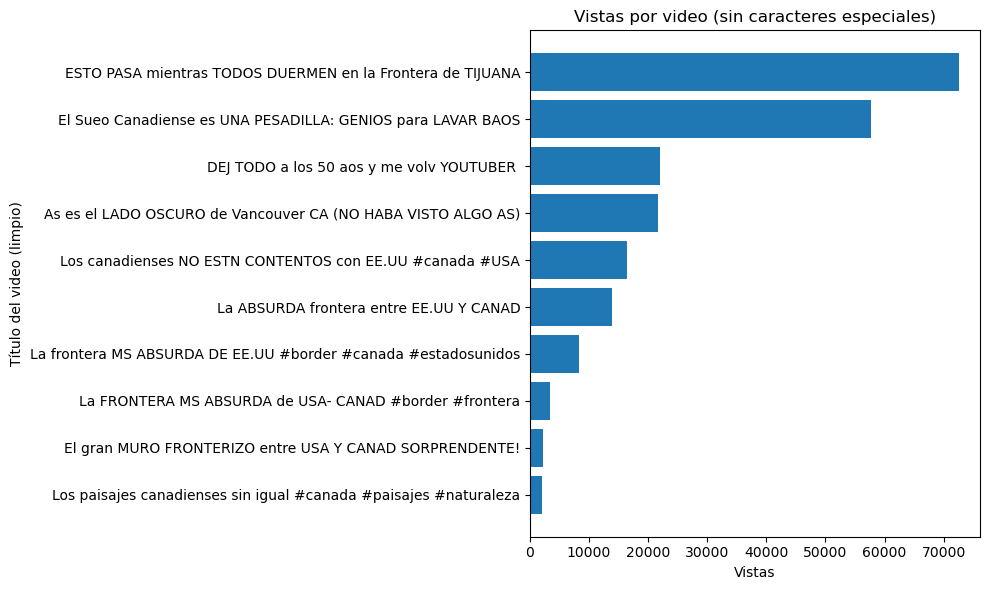

In [10]:
# 📊 Gráfico de barras: Vistas por video

# Ordenar los datos por vistas (descendente)
import re

# 🔧 Función para limpiar caracteres no ASCII (ej. emojis, banderas)
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Crear una copia de los títulos para mostrar sin caracteres especiales
df_sorted["title_clean"] = df_sorted["title"].apply(clean_text)

# 📊 Gráfico de barras limpio
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["title_clean"], df_sorted["views"])
plt.xlabel("Vistas")
plt.ylabel("Título del video (limpio)")
plt.title("Vistas por video (sin caracteres especiales)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


###  Vistas por video (Top videos)

Este gráfico de barras presenta el número de visualizaciones por video del canal, usando títulos limpiados para una mejor legibilidad.

#### 📌 Insights clave:

- **"ESTO PASA mientras TODOS DUERMEN..."** es el video con mayor cantidad de vistas, superando las 70,000.
- Otros videos con alto rendimiento incluyen:
  - **"El Sueño Canadiense es UNA PESADILLA"**
  - **"DEJÉ TODO a los 50 años y me volví YOUTUBER"**
- La mayoría de estos videos presentan temas con un componente emocional o controversial, lo que podría explicar su mejor desempeño.

#### 🎯 Interpretación:

Este gráfico permite identificar claramente qué tipo de contenido genera más vistas, lo cual es fundamental para optimizar la estrategia futura de creación de videos. Videos con títulos impactantes y temas controversiales parecen atraer mayor atención de la audiencia.


### 📍 2. Engagement rate vs Duración del video

In [11]:
print(df.columns.tolist())


['video_id', 'title', 'description', 'duration_sec', 'status', 'publish_date', 'tags', 'vidiq_score', 'views', 'likes', 'comments', 'num_links_description', 'num_words_description', 'creator_recommendations', 'engagement_rate']


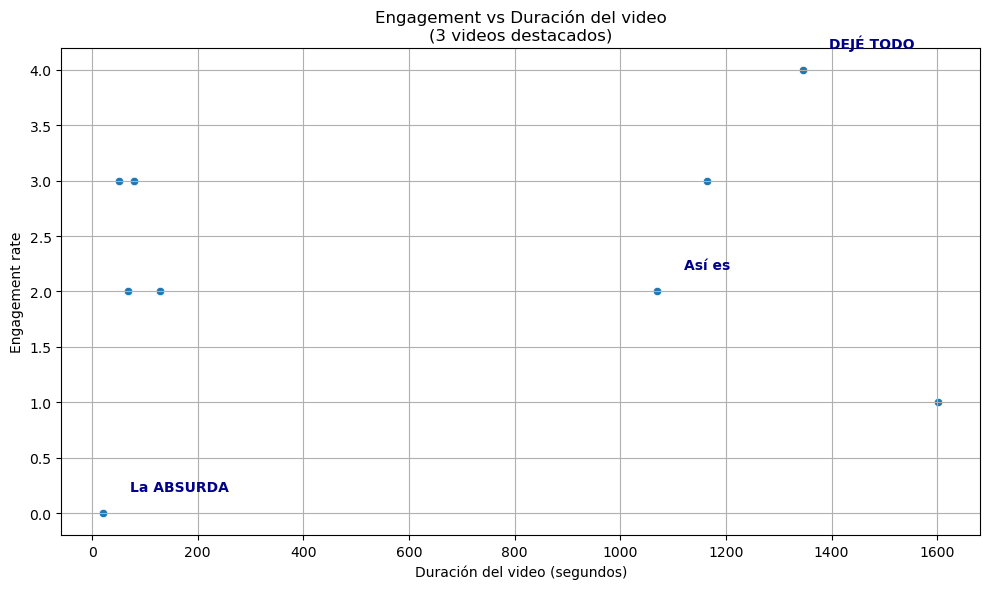

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular engagement promedio
mean_eng = df["engagement_rate"].mean()

# Encontrar índices clave
idx_max = df["engagement_rate"].idxmax()
idx_min = df["engagement_rate"].idxmin()
idx_mean = (df["engagement_rate"] - mean_eng).abs().idxmin()

# Lista de índices que sí se anotarán
highlight_idx = [idx_max, idx_min, idx_mean]

# Extraer 2 primeras palabras del título
def short_label(text):
    if isinstance(text, str):
        return " ".join(text.strip().split()[:2])
    return ""

df["title_short"] = df["title"].apply(short_label)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="duration_sec", y="engagement_rate")

# Anotar solo los seleccionados
for idx in highlight_idx:
    x = df.loc[idx, "duration_sec"]
    y = df.loc[idx, "engagement_rate"]
    label = df.loc[idx, "title_short"]
    plt.text(x + 50, y + 0.2, label, fontsize=10, color="darkblue", fontweight='bold')

plt.xlabel("Duración del video (segundos)")
plt.ylabel("Engagement rate")
plt.title("Engagement vs Duración del video\n(3 videos destacados)")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Engagement vs Duración del video (videos destacados)

Este gráfico de dispersión analiza la relación entre la **duración del video** y el **engagement rate**, destacando los tres videos con mejor rendimiento en términos de interacción.

#### 🔎 Videos destacados:
- **DEJÉ TODO**: Alto engagement y duración prolongada, sugiere que el contenido más largo puede ser efectivo si es relevante.
- **Así es**: Engagement intermedio con duración considerable.
- **La ABSURDA**: A pesar de tener un engagement bajo, su posición destaca como un punto de referencia para el contenido menos efectivo.

#### 📌 Insights clave:
- No hay una correlación lineal clara entre duración y engagement.
- Los videos con mejor engagement no necesariamente son los más cortos ni los más largos, lo que indica que el contenido y el formato podrían ser factores más importantes que la duración por sí sola.

Este tipo de visualización es útil para identificar outliers y oportunidades para replicar contenido exitoso.


### ✅3. Gráfico de líneas: Vistas a lo largo del tiempo

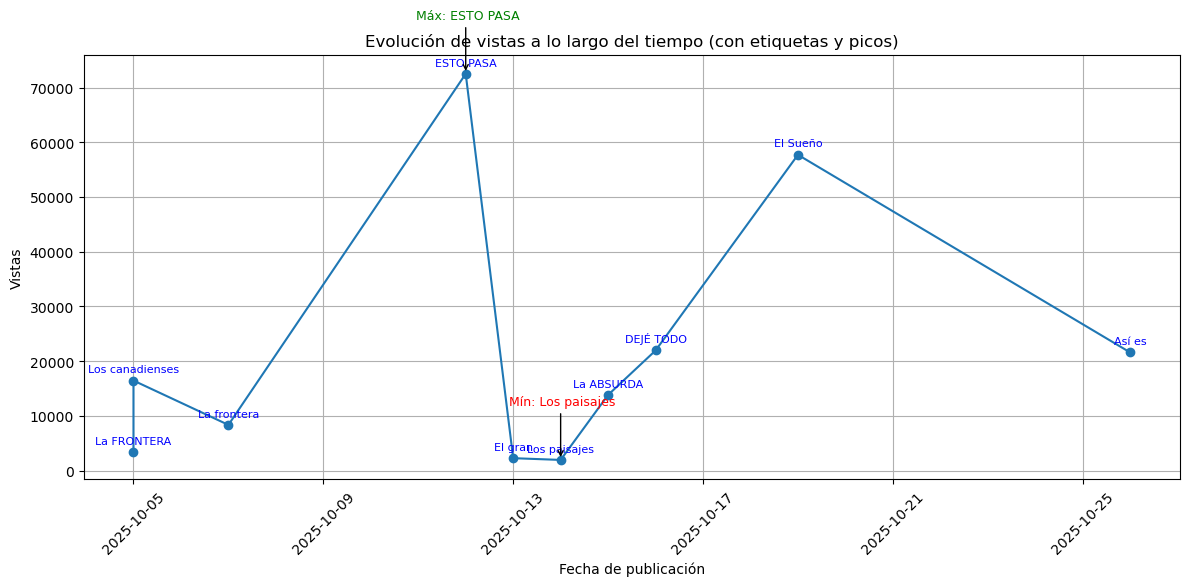

In [27]:
# Ordenar los datos por fecha
df_sorted_time = df.sort_values(by="publish_date").copy()

# Crear etiquetas abreviadas (primeras 2 palabras del título)
df_sorted_time["short_title"] = df_sorted_time["title"].apply(lambda x: " ".join(x.split()[:2]))

# Filas con máximo y mínimo después de crear short_title
max_row = df_sorted_time[df_sorted_time["views"] == df_sorted_time["views"].max()].iloc[0]
min_row = df_sorted_time[df_sorted_time["views"] == df_sorted_time["views"].min()].iloc[0]

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_sorted_time["publish_date"], df_sorted_time["views"], marker="o")

# Etiquetas en cada punto
for i, row in df_sorted_time.iterrows():
    plt.text(row["publish_date"], row["views"] + 1500, row["short_title"], fontsize=8, color="blue", ha='center')

# Anotación del máximo
plt.annotate(" Máx: " + max_row["short_title"],
             xy=(max_row["publish_date"], max_row["views"]),
             xytext=(max_row["publish_date"], max_row["views"] + 10000),
             arrowprops=dict(facecolor='green', arrowstyle="->"),
             fontsize=9, color="green", ha='center')

# Anotación del mínimo
plt.annotate(" Mín: " + min_row["short_title"],
             xy=(min_row["publish_date"], min_row["views"]),
             xytext=(min_row["publish_date"], min_row["views"] + 10000),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=9, color="red", ha='center')

# Estética
plt.xlabel("Fecha de publicación")
plt.ylabel("Vistas")
plt.title("Evolución de vistas a lo largo del tiempo (con etiquetas y picos)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📈 Evolución de vistas a lo largo del tiempo

Este gráfico de líneas muestra cómo han evolucionado las **vistas** de los videos a lo largo del tiempo, permitiendo identificar tendencias, picos de rendimiento y momentos clave.

#### 📌 Insights clave:
- El video **"ESTO PASA"** alcanzó el mayor número de vistas con más de **70,000 reproducciones**, marcando un pico importante en la estrategia de contenido.
- El video con menor rendimiento fue **"Los paisajes"**, lo que sugiere menor relevancia o efectividad en ese momento.
- Se observan **fluctuaciones importantes** en las vistas, lo que puede estar relacionado con el tipo de contenido, el momento de publicación o factores externos.

Este análisis ayuda a entender el comportamiento de la audiencia a lo largo del tiempo y optimizar la **programación de publicaciones** futuras.


### ✅4. Gráfico de correlación (Heatmap)


 Matriz de correlación:


,views,likes,comments,vidiq_score,duration_sec,engagement_rate
views,1.000000,0.775029,0.526304,0.880742,0.820274,-0.174193
likes,0.775029,1.000000,0.929139,0.799405,0.821152,0.362486
comments,0.526304,0.929139,1.000000,0.601484,0.683146,0.521033
vidiq_score,0.880742,0.799405,0.601484,1.000000,0.790836,-0.185737
duration_sec,0.820274,0.821152,0.683146,0.790836,1.000000,0.109686
engagement_rate,-0.174193,0.362486,0.521033,-0.185737,0.109686,1.000000


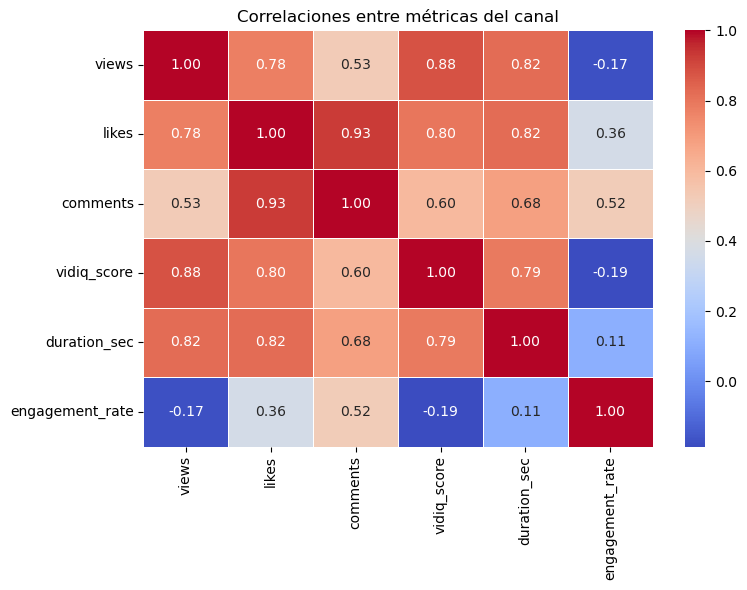

In [30]:
# 📈 5. Matriz de correlación entre métricas numéricas
numeric_cols = ["views", "likes", "comments", "vidiq_score", "duration_sec", "engagement_rate"]
correlation_matrix = df[numeric_cols].corr()

print("\n Matriz de correlación:")
display(correlation_matrix)

# 🎨 6. Visualización: Heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlaciones entre métricas del canal")
plt.tight_layout()
plt.show()


### 🔍 Heatmap de Correlaciones

Este gráfico muestra la **correlación entre variables clave del canal** como vistas, likes, comentarios, duración, puntaje de vidIQ y engagement rate.

#### 📌 *Insights clave*:

- Las vistas tienen **alta correlación** con:
  - 👍 **Likes** (0.78)
  - 💬 **Comentarios** (0.53)
  - 🔢 **vidIQ score** (0.88)
  - ⏱️ **Duración del video** (0.82)

- El **engagement rate** tiene una **correlación más baja** con otras métricas, destacando que **no siempre los videos más largos o con más vistas generan más engagement**.

---

✅ Este análisis ayuda a **identificar relaciones importantes entre métricas** para orientar decisiones de contenido basadas en datos.


### ✅ 5. Gráfico de dispersión: Engagement rate vs Likes

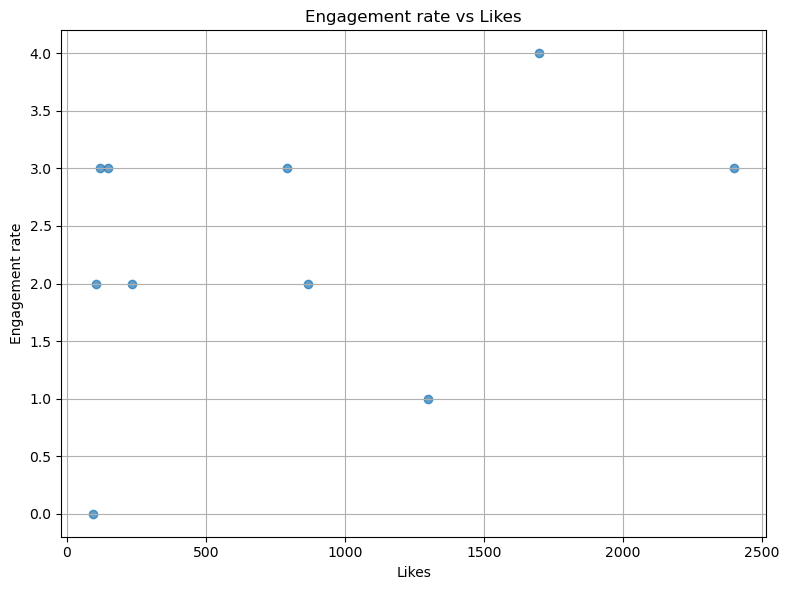

In [31]:
import matplotlib.pyplot as plt

# Gráfico de dispersión: likes vs engagement_rate
plt.figure(figsize=(8, 6))
plt.scatter(df["likes"], df["engagement_rate"], alpha=0.7)
plt.xlabel("Likes")
plt.ylabel("Engagement rate")
plt.title("Engagement rate vs Likes")
plt.grid(True)
plt.tight_layout()
plt.show()


### Gráfico de dispersión: Engagement rate vs Likes

Este gráfico permite visualizar la relación entre el número de "likes" que recibe un video y su "engagement rate".

**Observaciones:**
- Una tendencia positiva indicaría que los videos con más likes también generan más engagement relativo.
- La dispersión revela qué videos son atípicos (muchos likes pero bajo engagement, o viceversa).

Esta visualización ayuda a detectar si el número absoluto de likes realmente representa una buena conexión con la audiencia.


### ✅6. Histograma – Distribución de duración de los videos

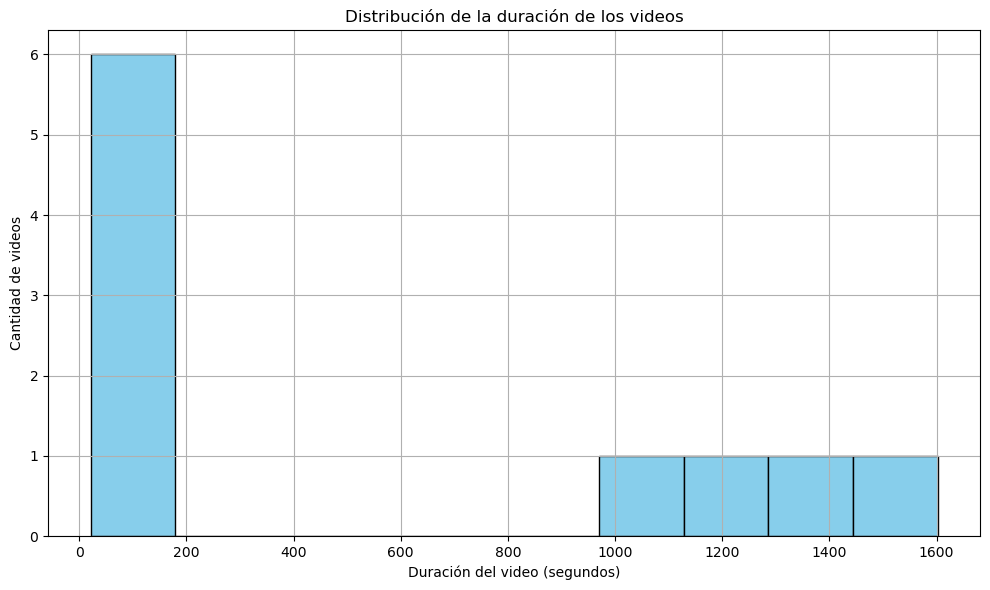

In [32]:
# 📊 Histograma de distribución de duración de los videos

plt.figure(figsize=(10, 6))
plt.hist(df["duration_sec"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribución de la duración de los videos")
plt.xlabel("Duración del video (segundos)")
plt.ylabel("Cantidad de videos")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Histograma: Distribución de duración de los videos

Este gráfico muestra cómo se distribuyen los videos del canal en función de su duración (en segundos).

**Insights clave:**

- La mayoría de los videos tienen una duración corta, menor a 200 segundos.
- Solo unos pocos videos superan los 1,000 segundos, indicando que los videos más largos son menos frecuentes.
- Esto sugiere una estrategia centrada en contenido breve, con algunas excepciones de videos largos posiblemente usados para experimentación o temas especiales.

Este análisis es útil para evaluar la estrategia de duración de los videos en relación con la retención de audiencia y el engagement.


## 🧠 G. Conclusiones e insights accionables

Tras el análisis de las métricas del canal de YouTube, se identifican patrones relevantes que pueden guiar futuras decisiones estratégicas de contenido y optimización:

### 📌 1. Contenido que genera mayor impacto
- Los videos con títulos llamativos, narrativas personales y/o elementos emocionales tienden a recibir más vistas.
- Los videos más vistos también muestran un alto número de likes y comentarios, lo que refleja una conexión emocional o valor percibido por la audiencia.

### 📌 2. Relación entre duración y engagement
- No existe una relación lineal clara entre duración y engagement rate.
- Algunos videos largos presentan alto engagement, lo que indica que **la duración no es un obstáculo si el contenido es relevante**.

### 📌 3. Visibilidad vs Interacción
- Se observó una fuerte correlación entre vistas, likes y comentarios.
- Sin embargo, el engagement rate no siempre se alinea con la popularidad (vistas), lo que sugiere que algunos videos generan **tráfico sin necesariamente fidelizar a la audiencia**.

### 📌 4. Distribución del contenido
- La mayoría de los videos tienen una duración inferior a 200 segundos.
- Una estrategia de contenido mixto (videos cortos + largos con alto valor) puede equilibrar el alcance masivo con la retención.

---

### ✅ Recomendaciones estratégicas:

- **Reforzar** los temas y formatos que han generado picos de vistas y engagement.
- **Experimentar** con nuevas temáticas manteniendo un enfoque en storytelling auténtico y emocional.
- **Monitorear de forma continua** la evolución de las métricas clave para ajustar la estrategia en tiempo real.


## 🛠️ H. Herramientas utilizadas y habilidades demostradas

Este proyecto de análisis de datos fue desarrollado en **Jupyter Notebook** como parte de un portafolio profesional de un **Strategic Data Analyst (MBA)** con experiencia en contenido digital y toma de decisiones basada en datos.

### 🧰 Herramientas y tecnologías aplicadas:
- **Python**: Lenguaje principal para análisis de datos.
- **Pandas**: Manipulación, limpieza y transformación de datos tabulares.
- **Matplotlib y Seaborn**: Visualización gráfica y exploración de relaciones entre variables.
- **Jupyter Notebook**: Entorno interactivo para análisis reproducible y storytelling con datos.

### 📊 Habilidades demostradas:
- Exploración y limpieza de datos reales provenientes de YouTube Analytics.
- Generación de insights estratégicos a partir de métricas de rendimiento.
- Comunicación clara de hallazgos mediante visualizaciones efectivas.
- Aplicación de pensamiento analítico y enfoque orientado al negocio.
- Presentación profesional de resultados en un formato estructurado y visual.

---

💼 Este análisis demuestra la capacidad de convertir datos sin procesar en información valiosa para la toma de decisiones estratégicas en entornos digitales y de contenido.
